<a href="https://colab.research.google.com/github/samrat1699/Robust-statistics-with-R/blob/main/Copy_of_Robust_statistics_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### **Problem-1:** Generate 1000 normal distribution data with mean 5 and variance 1. Draw the graph of (x-5)^2 and |x-5|.
  


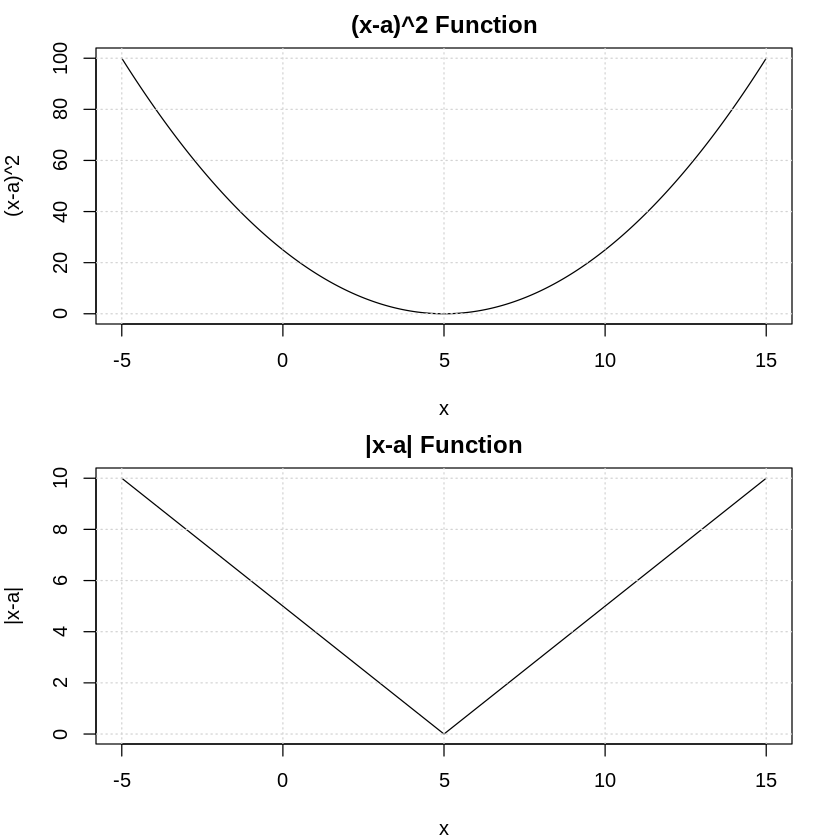

In [ ]:
#generate 1000 N~(5, 1)
data <- rnorm(1000, mean=5, sd = 1)
a = 5
#sequence of x values
x <- seq(a-10, a+10, length.out = length(data))

# Define two functions: (x-a)^2 and |x-a|
f1 <- (x - a)^2
f2 <- abs(x - a)

# Create a 2x1 subplot layout
par(mfrow = c(2, 1),mar = c(4, 4, 2, 2))

# Plot the first function (x-a)^2
plot(x, f1, type = 'l', xlab = "x", ylab = "(x-a)^2",
main = "(x-a)^2 Function")
grid()

# Plot the second function |x-a|
plot(x, f2, type = 'l', xlab = "x", ylab = "|x-a|",
main = "|x-a| Function")
grid()

###### **Problem-2:** For various values of tao and epsilon create table of nvar(xbar) and nvar(med(x))

In [ ]:
# Function of nvar(xbar)
var_xbar <- function(epsilon, tao){
  nvar_xbar <- ((1-epsilon) + epsilon * tao^2)
  return(nvar_xbar)
}
#Function of nvar(med(x))
var_med <- function(epsilon, tao){
  nvar_med <- pi / (2 * (1 - epsilon + epsilon / tao)^2)
  return(nvar_med)
}
# values of epsilon and tao
epsilon_vals <- c(0.05, 0.10, 0.15)
tao_vals <- c(3, 4, 5, 6, 10, 20)

#calculation variances for each combination of epsilon and tao
results <- data.frame()
for (epsilon in epsilon_vals){
  for (tao in tao_vals){
    nvar_xbar <- var_xbar(epsilon, tao)
    nvar_med <- var_med(epsilon, tao)
    results <- rbind(results, data.frame(tao, nvar_xbar, nvar_med))
  }
  # Print the results
  cat("Epsilon =", epsilon, "\n")
  rounded_results <- round(results, 2)
  print(rounded_results)
  cat("\n")  #blank line as a separate
  results <- data.frame()
}


Epsilon = 0.05 
  tao nvar_xbar nvar_med
1   3      1.40     1.68
2   4      1.75     1.70
3   5      2.20     1.70
4   6      2.75     1.71
5  10      5.95     1.72
6  20     20.95     1.73

Epsilon = 0.1 
  tao nvar_xbar nvar_med
1   3       1.8     1.80
2   4       2.5     1.84
3   5       3.4     1.86
4   6       4.5     1.87
5  10      10.9     1.90
6  20      40.9     1.92

Epsilon = 0.15 
  tao nvar_xbar nvar_med
1   3      2.20     1.94
2   4      3.25     1.99
3   5      4.60     2.03
4   6      6.25     2.05
5  10     15.85     2.10
6  20     60.85     2.14



###### **Problem-3:** Generate 1000 data from standard normal distribution and draw graphs of rho(ρ) and psi(ψ) for mean, median and Huber


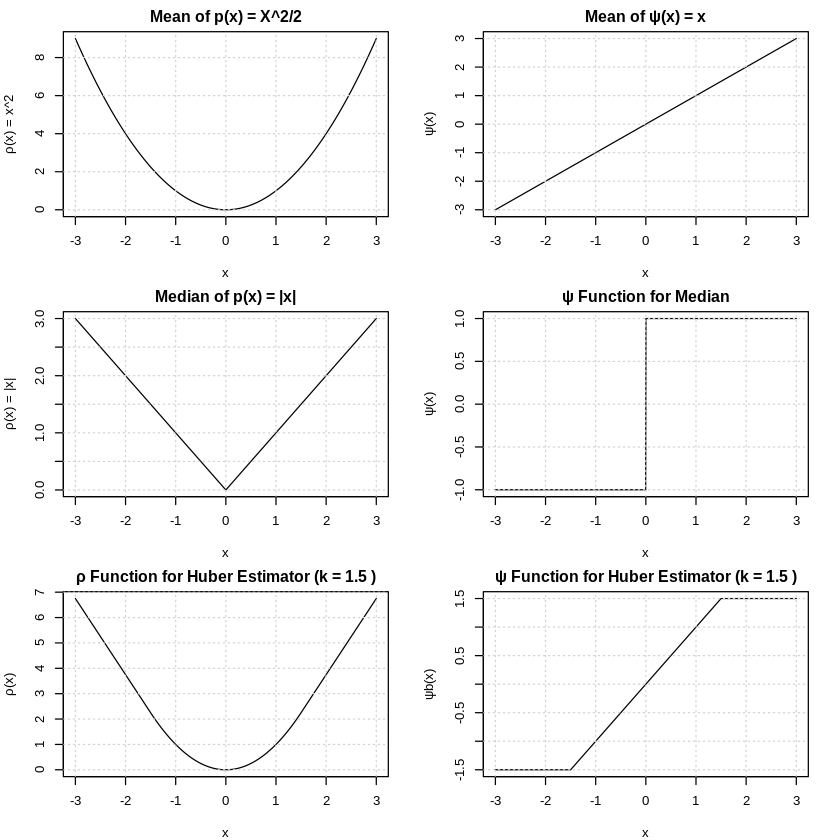

In [ ]:
data <- rnorm(1000, 0,1)# Generate 1000 data N~(0,1)
x <- seq(-3, 3, length.out = length(data))#sequence of x values
k=1.5 # for Huber parameter

# Define rho(ρ) function of mean, median and Huber
rho_mean <- (x^2)
rho_median <- abs(x)
rho_Huber <- ifelse(abs(x) <= k, x^2, 2*k*abs(x)-k^2)

# Define psi(ψ)function of mean, median and Huber
psi_mean <- x
psi_median <- sign(x)
psi_Huber <- ifelse(abs(x) <= k, x, k * sign(x))

par(mfrow = c(3, 2),mar = c(4, 4, 2, 2))# Create a 3x1 grid of subplots

#plot of mean
plot (x, rho_mean, type = 'l', xlab = 'x', ylab = "ρ(x) = x^2",
main = "Mean of p(x) = X^2/2")
grid()
#plot of psi mean
plot (x, psi_mean,type = 'l', xlab = 'x', ylab = "ψ(x)",
main = "Mean of ψ(x) = x")
grid()

#plot of median
plot (x, rho_median, type = 'l', xlab = 'x', ylab = "ρ(x) = |x|",
main = "Median of p(x) = |x|")
grid()
#plot of psi median
plot(x, psi_median,type = 'l',xlab = "x", ylab = "ψ(x)",
main = "ψ Function for Median")
grid()

#plot of huber
plot (x, rho_Huber, type = 'l',xlab = 'x', ylab = "ρ(x)",
main = paste("ρ Function for Huber Estimator (k =", k, ")"))
grid()
#plot of psi huber
plot(x, psi_Huber,type = 'l',xlab = "x", ylab = "ψb(x)",
main = paste("ψ Function for Huber Estimator (k =", k, ")"))
grid()

In [ ]:
#data <- rnorm(1000, 0,1)# Generate 1000 data N~(0,1)
#x <- seq(-3, 3, length.out = length(data))#sequence of x values
x <- c(2, -3, 9, 3, 10, 5, -5, 1, 1.5)
k=3 # for Huber parameter

# Define rho(ρ) function of mean, median and Huber
rho_mean <- (x^2)
rho_median <- abs(x)
rho_Huber <- ifelse(abs(x) <= k, x^2, 2*k*abs(x)-k^2)

# Define psi(ψ)function of mean, median and Huber
psi_mean <- x
psi_median <- sign(x)
psi_Huber <- ifelse(abs(x) <= k, x, k * sign(x))

In [ ]:
psi_Huber

[1]  2.0 -3.0  3.0  3.0  3.0  3.0 -3.0  1.0  1.5

In [ ]:
# Define the w(x) function
w <- function(x, k=3) {
  return(pmin(1, k / abs(x)))
}

x <- c(2, -3, 9, 3, 10, 5, -5, 1, 1.5)
# Calculate the corresponding w(x) values
w_values <- w(x)

w_values



[1] 1.0000000 1.0000000 0.3333333 1.0000000 0.3000000 0.6000000 0.6000000
[8] 1.0000000 1.0000000

##### **Problem-4:** Generate 1000 standard normal data and draw Huber function

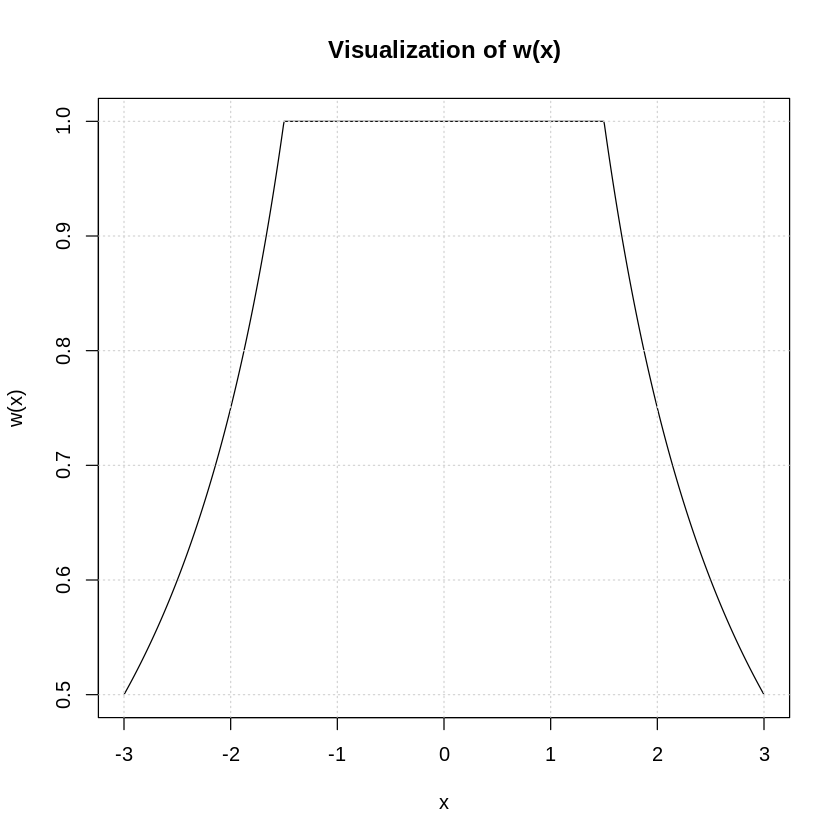

In [ ]:
# Define the w(x) function
w <- function(x, k=1.5) {
  return(pmin(1, k / abs(x)))
}

# Generate data 1000, N~(0,1)
data <- rnorm(1000, 0, 1)
x <- seq(-3, 3, length.out = length(data))

# Calculate the corresponding w(x) values
w_values <- w(x)

#visualize w(x) as a function of x
plot(x, w_values,type = 'l',xlab = "x", ylab = "w(x)",
main = "Visualization of w(x)")
grid()

##### **Problem-5:** Generate 10,000 data in which 95% came from standard normal distribution and 5% came from normal distribution with mean 10, variance 1. Find the M-Estimate

In [ ]:
set.seed(200)  # For reproducibility
x <- c(rnorm(0.95 * 10000), rnorm(0.05 * 10000, mean = 10, sd = 1))
mean <- mean(x)
cat("mean:", mean)

# Define the w(x) function
w <- function(x, k=1.5) {
  return(pmin(1, k / abs(x)))
}

Huber_M <- function(x,tol = 1e-10) {
  mu <- median(x)
  weighted_diff <- w(x - mu)
  mu_new <- sum(weighted_diff * x) / sum(w(x))
  while(abs(mu_new - mu) > tol) {
    mu <- mu_new
    weighted_diff <- w(x - mu)
    mu_new <- sum(weighted_diff * x) / sum(weighted_diff)
    }
    return(mu_new)
  }

# Call the Huber_M function
huber_estimate <- Huber_M(x)
cat('\nhuber_estimate:',huber_estimate)

mean: 0.497539
huber_estimate: 0.08472451

In [ ]:
set.seed(200)  # For reproducibility
x <- c(rnorm(0.95 * 10000), rnorm(0.05 * 10000, mean = 10, sd = 1))
mean_x <- mean(x)
cat("mean:", mean_x)

# Define the w(x) function
w <- function(x, k = 1.5) {
  return(pmin(1, k / abs(x)))
}

Huber_M <- function(x, tol = 1e-10) {
  mu <- median(x)
  weighted_diff <- w(x - mu)
  mu_new <- sum(weighted_diff * x) / sum(weighted_diff)

  while (abs(mu_new - mu) > tol) {
    mu <- mu_new
    weighted_diff <- w(x - mu)
    mu_new <- sum(weighted_diff * x) / sum(weighted_diff)
  }

  return(mu_new)
}

# Call the Huber_M function
huber_estimate <- Huber_M(x)
cat('\nhuber_estimate:', huber_estimate, '\n')


mean: 0.497539
huber_estimate: 0.08472451 


In [ ]:
set.seed(200)  # For reproducibility
x <- c(rnorm(0.95 * 10000), rnorm(0.05 * 10000, mean = 10, sd = 1))
mean_x <- mean(x)
cat("mean:", mean_x)

# Define the w(x) function for bisquare
w_bisquare <- function(x, k = 4.685) {
  return((1 - (x/k)^2)^2 * (abs(x) <= k))
}

Bisquare_M <- function(x, tol = 1e-10) {
  mu <- median(x)
  weighted_diff <- w_bisquare(x - mu)
  mu_new <- sum(weighted_diff * x) / sum(weighted_diff)

  while (abs(mu_new - mu) > tol) {
    mu <- mu_new
    weighted_diff <- w_bisquare(x - mu)
    mu_new <- sum(weighted_diff * x) / sum(weighted_diff)
  }

  return(mu_new)
}

# Call the Bisquare_M function
bisquare_estimate <- Bisquare_M(x)
cat('\nbisquare_estimate:', bisquare_estimate, '\n')


mean: 0.497539
bisquare_estimate: -0.007841816 
